In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as optm
from numpy.random import random

In [3]:
path = "data/Resonanzmethode/"
filenames = next(os.walk(path))[2]
k = 9.0

data = {}
for filename in filenames:
    raw = np.loadtxt(path + filename)
    data[filename] = {"freq": raw[:,0], "amp": raw[:,1] * k}

#envs = np.loadtxt(path + "envs/envs.dat", skiprows=1)



22.31063820326898 +- 0.3612092081293101
-21.418902129763936 +- 1.0635890820490441
45.702242835274674 +- 1.4158817216760224
46.25886227602168 +- 1.9931392102857817


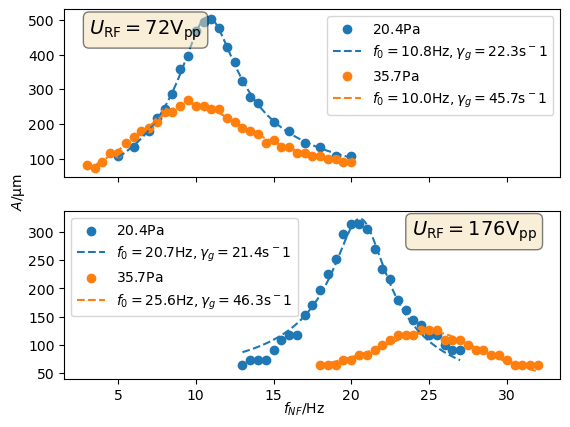

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True)

#resonance_function = lambda omega, omega_0, gamma, cr, A\
#    : A / (np.sqrt((omega_0 ** 2 - omega ** 2) ** 2 + gamma ** 2 * omega ** 2)) * omega * cr / np.sqrt(1 + (omega * cr) ** 2)

def resonance_function(f, f_0, gamma, cr, A):
    omega = 2 * np.pi * f
    omega_0 = 2 * np.pi * f_0
    return A / (np.sqrt((omega_0 ** 2 - omega **2)**2 + gamma**2*omega**2))* omega*cr / np.sqrt(1+ (omega * cr)**2)

def plot(key, ax, label):
    x = data[key]["freq"]
    y = data[key]["amp"]
    #ax.set(title="test")
    ax.scatter(x, y, label=label)
    p_0 = (20 / (2 * np.pi), 2 / (2 * np.pi), 1, 1000)
    (omega_0, gamma, cr, A), cv = optm.curve_fit(resonance_function, x, y, p_0, maxfev=100000)
    x_linspace = np.linspace(min(x), max(x), 1000)
    ax.plot(x_linspace, resonance_function(x_linspace, omega_0, gamma, cr, A), label=f"$f_0 = {abs(omega_0):.3} \\mathrm{{Hz}}, \\gamma_g = {abs(gamma):.3}\\mathrm{{s^{-1}}}$", linestyle="--")
    ax.legend()
    ax.grid()
    print(f"{gamma} +- {np.absolute(cv[1][1]**0.5)}")


plot("1.dat", axs[0], "$20.4 \\mathrm{Pa}$")
plot("2.dat", axs[1], "$20.4 \\mathrm{Pa}$")

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs[0].text(0.05, 0.95, '$U_\\mathrm{RF} = 72\\mathrm{V_{pp}}$', transform=axs[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plot("4.dat", axs[0], "$35.7 \\mathrm{Pa}$")
plot("3.dat", axs[1], "$35.7 \\mathrm{Pa}$")

axs[1].text(0.70, 0.95, '$U_\\mathrm{RF} = 176\\mathrm{V_{pp}}$', transform=axs[1].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

fig.text(0.5, 0.04, '$f_{NF} / \\mathrm{Hz} $', ha='center')
fig.text(0.04, 0.5, '$A / \\mathrm{\\mu m}$', va='center', rotation='vertical')
#ax.legend()

fig.savefig('resonanzmethode.png')

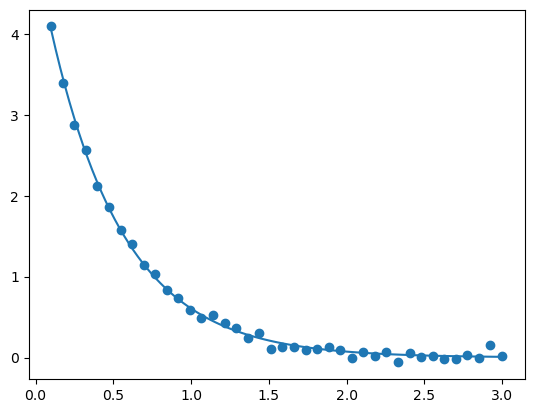

In [77]:
from numpy.random import default_rng
rng = default_rng()
A = 5
alpha = 2.11
expo = lambda t, alpha : A * np.exp(-alpha*t)
ts = np.linspace(0.1, 3, 100)

fig2, ax2 = plt.subplots()
t_exp = np.linspace(0.1,3,40)

ax2.scatter(t_exp, expo(t_exp, alpha) +  rng.normal(loc=0.0, scale=0.05,size=len(t_exp)))
ax2.plot(ts, expo(ts, alpha))

In [78]:
R_c = 0.2
g = 9.80665
gamma = 3.6 # 7.3

alpha = (np.sqrt(gamma **2 * R_c **2 - 4*g*R_c) - gamma * R_c)/ (2*R_c)
print(alpha)

nan


C:\Users\hchr\AppData\Local\Temp\ipykernel_7660\1400412117.py:5: RuntimeWarning: invalid value encountered in sqrt
  alpha = (np.sqrt(gamma **2 * R_c **2 - 4*g*R_c) - gamma * R_c)/ (2*R_c)


In [52]:
print(4*g/ R_c)

196.13299999999998


In [53]:
#alpha = -1.76040
-( g +  R_c * alpha**2) / (R_c * alpha)

25.27600000000001

In [18]:

3.55 * 2 * np.pi

22.30530784048753